# Analýza dopytov

Pre dané kľúčové slová za pomoci knižnice _pytrends_ získame 

In [105]:
%pip install pytrends pandas selenium

Note: you may need to restart the kernel to use updated packages.


In [111]:
import time
from selenium import webdriver

def get_cookie():
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options=options)
    driver.get("https://trends.google.com/")
    time.sleep(5)
    cookie = driver.get_cookie("NID")["value"]
    driver.quit()
    return cookie

Zistíme si súvisiace dopyty.

In [141]:
from pytrends.request import TrendReq

nid_cookie = f"NID={get_cookie()}"

# 'virus china', 'acute respiratory', 'confirmed cases', 'ongoing pandemic', 'disease control', 'health emergency'
# 'corona virus', 'respiration infection', 'confirmed cases coronavirus', 'pandemic meaning', 'control of disease', 'public health emergency'

ptr = TrendReq(requests_args={"headers": {"Cookie": nid_cookie}})
ptr.build_payload(kw_list=['corona virus'], timeframe='2020-01-01 2021-12-31')

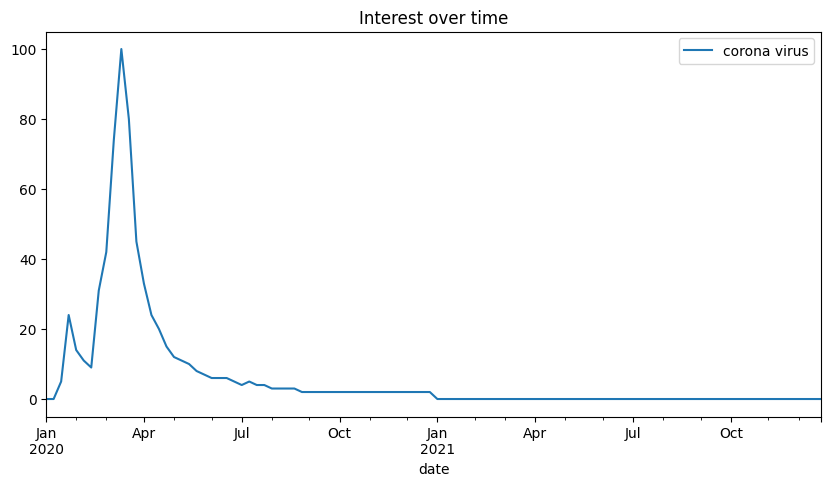

In [142]:
data = ptr.interest_over_time()
data.plot(kind="line", title="Interest over time", figsize=(10,5));

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data.head(10))

In [116]:
import pandas as pd

related_queries = ptr.related_queries()

df_top = pd.DataFrame(related_queries.get(keyword).get('top'))
df_rising = pd.DataFrame(related_queries.get(keyword).get('rising'))

df_top_styler = df_top.head(3).style.set_table_attributes("style='display:inline'").set_caption('Top')
df_rising_styler = df_rising.head(3).style.set_table_attributes("style='display:inline'").set_caption('Rising')

display_html(df_top_styler._repr_html_() + df_rising_styler._repr_html_(), raw=True)

,query,value
0,corona virus,100
1,virus corona china,100
2,corona china,99
,query,value
0,corona virus,3761000
1,virus corona china,3744750
2,corona china,3738350


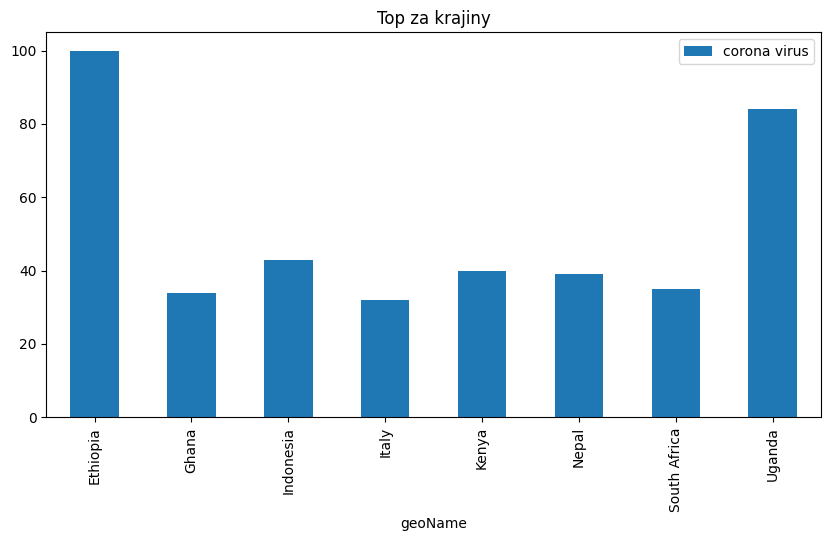

In [156]:
data = ptr.interest_by_region(resolution='COUNTRY', inc_low_vol=False, inc_geo_code=False)
data = data.query('`corona virus` > 30')
data.plot(kind="bar", title="Top za krajiny", figsize=(10,5));